# LINEAR REGRESSION (PRICE_HOUSES)

### IMPORTING LIBRARIES

In [1]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### LOADING DATASET

In [2]:

houses= pd.read_csv(r"C:\Users\alber\OneDrive\Escritorio\Machine Learning\house_prices.csv")
houses.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### BASIC EXPLORATION AND DATA CLEANING

In [3]:
houses.shape

(1460, 81)

In [4]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
houses.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
 houses['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [7]:
 houses['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [8]:

# Let's change the type of the column ' Neighborhood' to numerical in order to check if it's useful for the model.

houses['neigh_numeric'], _ = pd.factorize(houses
['Neighborhood'])
houses.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,neigh_numeric
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3


In [9]:

nueva_columna = dict(zip(houses['Neighborhood'], houses['neigh_numeric']))

for delito, valor_numerico in nueva_columna.items():
    print(f"Tipo de delito: {delito}, Valor numérico: {valor_numerico}")
    

Tipo de delito: CollgCr, Valor numérico: 0
Tipo de delito: Veenker, Valor numérico: 1
Tipo de delito: Crawfor, Valor numérico: 2
Tipo de delito: NoRidge, Valor numérico: 3
Tipo de delito: Mitchel, Valor numérico: 4
Tipo de delito: Somerst, Valor numérico: 5
Tipo de delito: NWAmes, Valor numérico: 6
Tipo de delito: OldTown, Valor numérico: 7
Tipo de delito: BrkSide, Valor numérico: 8
Tipo de delito: Sawyer, Valor numérico: 9
Tipo de delito: NridgHt, Valor numérico: 10
Tipo de delito: NAmes, Valor numérico: 11
Tipo de delito: SawyerW, Valor numérico: 12
Tipo de delito: IDOTRR, Valor numérico: 13
Tipo de delito: MeadowV, Valor numérico: 14
Tipo de delito: Edwards, Valor numérico: 15
Tipo de delito: Timber, Valor numérico: 16
Tipo de delito: Gilbert, Valor numérico: 17
Tipo de delito: StoneBr, Valor numérico: 18
Tipo de delito: ClearCr, Valor numérico: 19
Tipo de delito: NPkVill, Valor numérico: 20
Tipo de delito: Blmngtn, Valor numérico: 21
Tipo de delito: BrDale, Valor numérico: 22
Tipo 

In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:

# Checking the Null values in the DataSet.

columns_with_nulls = houses.columns[houses.isnull().any()]

print("Columns with Null values:")
print(columns_with_nulls)


Columns with Null values:
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


* We observe all columns that have Null values are object and they'll be useless for our model so let's remove them.

In [12]:

# Checking the duplicated values.

duplicated_values = houses[houses.duplicated()]       

if not  duplicated_values.empty:
    print(" Duplicated rows were found:")
    print(duplicates)
else:
    print("There are no duplicated rows.")


print("Total amount of duplicated rows:", len(duplicated_values))


There are no duplicated rows.
Total amount of duplicated rows: 0


In [13]:

# Let's create a new datset which only includes numerical columns.

houses_1 = houses.select_dtypes(include=[np.number])
houses_1.shape


(1460, 39)

### STUDYING THE DATASET

<Axes: >

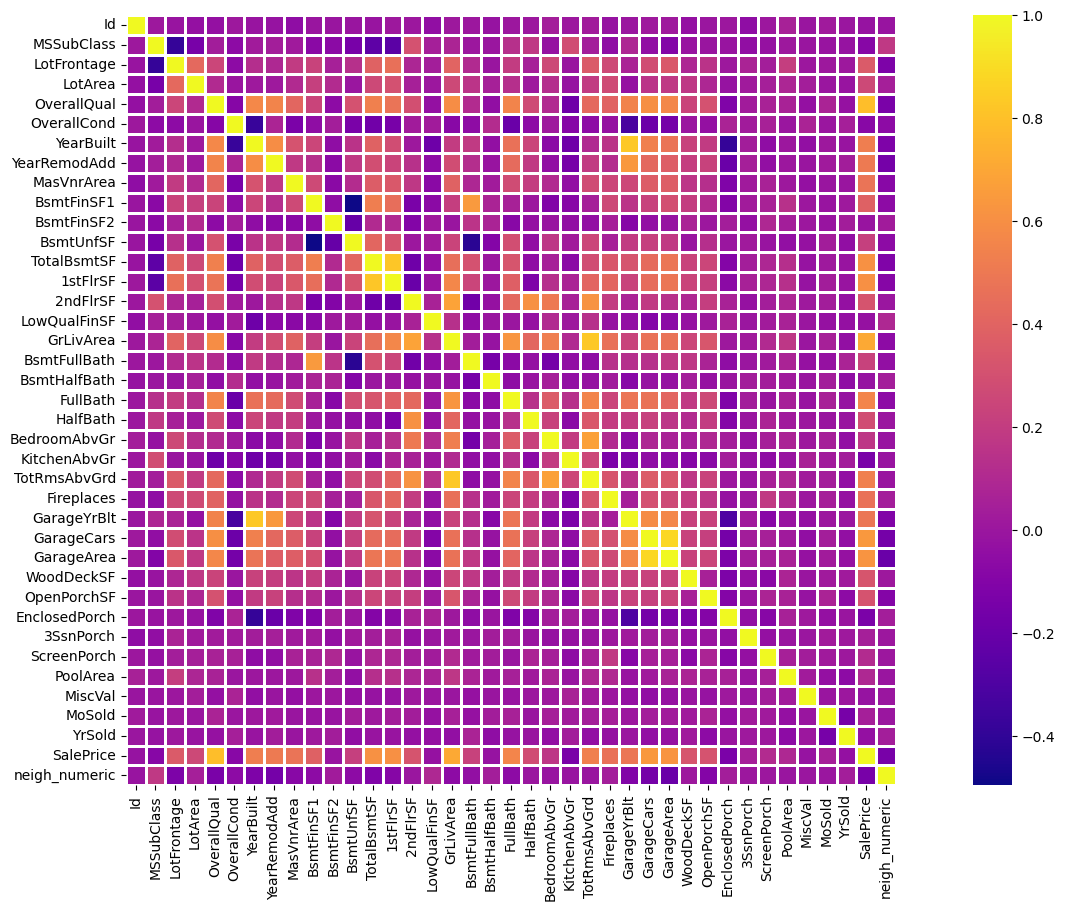

In [14]:

corr =houses_1.corr()

f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,cmap='plasma',square= True, linewidths= 1)


* We observe a higher correlation between the dependent variable (SalePrice) and the independent variables 
  (OverallQual, SalePrice, GrLivArea and, GarageArea, 'YearBuilt', 'YearRemodAdd' and, 'TotalBsmtSF'.

In [39]:

# Let's create a new dataset with only these variables.

df = houses_1[["OverallQual", "SalePrice","GrLivArea","GarageArea", 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']].copy()
df


,OverallQual,SalePrice,GrLivArea,GarageArea,YearBuilt,YearRemodAdd,TotalBsmtSF
0,7,208500,1710,548,2003,2003,856
1,6,181500,1262,460,1976,1976,1262
2,7,223500,1786,608,2001,2002,920
3,7,140000,1717,642,1915,1970,756
4,8,250000,2198,836,2000,2000,1145
...,...,...,...,...,...,...,...
1455,6,175000,1647,460,1999,2000,953
1456,6,210000,2073,500,1978,1988,1542
1457,7,266500,2340,252,1941,2006,1152
1458,5,142125,1078,240,1950,1996,1078


## LINEAR REGRESSION

### DATA PREPROCESSING

In [40]:

X = df[["OverallQual","GrLivArea","GarageArea", 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']]
Y = df['SalePrice']


### DATA VISUALIZATION

In [41]:

import plotly.express as px

fig = px.scatter_3d(df, x="OverallQual", y="GrLivArea", z="GarageArea", size = 'YearBuilt', color='SalePrice',
      title= '3D PLOT DATA VISUALIZATION', opacity=0.7)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)

fig.show()



* Data are very conglomerate with a few outliers.

* The 'Overallqual' shows a stronger dependency with the 'SalePrice' than the rest of variables and, after having applied         various  models this turned out to be the most reliable.
 
* The 'GrLiveArea' also shows a strong dependency with the dependent variable ; Those houses that exceed 2000 meters in area, 
  increase considerably their prices.
  
* I've chosen to show "OverallQual", "GrLivArea", "GarageArea", and 'YearBuilt' in the 3d-Plot over the rest since they have       proved to have a stronger dependency with the 'SalePrice'.

* We can see some outliers, for example, in 2008 the price of a house with similar caracteristics to one from 2002 is more         expensive this is due to the financial crisis started in the same year; In 1915 we can observe the same, in this case
  because of the recession caused by the outbreak of the World War I and also, the inflation has increased over the years         resulting in higher prices.
  

### DATA PARTITIONING (TRAINING AND TEST SETS)

In [42]:

X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size= 0.2, random_state= 1)

X_train, X_val, y_train, y_val= train_test_split(X_train,y_train, test_size= 0.25, random_state= 1)


### CREATION OF THE LINEAR REGRESSION MODEL

In [43]:

lr= LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

### VALIDATION DATASET PREDICTION

In [44]:
y_pred = lr.predict(X_val)

In [45]:
y_pred

array([217048.43118405, 181774.524025  , 233760.04321324,  97358.88624341,
       193032.50561863, 107513.4538743 , 170037.82437539, 203119.02102483,
       260000.69368314, 131357.20805736, 167950.99836328, 215139.98207574,
       177311.07624651, 253892.36753838, 212356.3304179 , 256879.04095423,
       289987.2264816 ,  84170.81678015, 210719.33794011, 120911.69644044,
        95653.87852697, 222161.55795631, 204347.70794165, 217836.36804411,
       159920.05962487, 265462.80521421, 179586.05175148, 140203.25217709,
       360955.72386687, 147014.07994179, 188875.56968511, 111495.27339022,
       130357.07347286, 274460.8611479 , 168333.08396744, 151686.45823514,
       110020.11876234, 104791.24383751, 123732.58018561, 203783.15982341,
       241712.56495006, 179829.38008499, 177140.29137713, 325393.44061561,
       124287.47639936, 149259.54518934, 233467.36227734, 124482.1146078 ,
       207645.95401327, 155162.78652391, 289168.63671537, 291319.00285075,
       181452.6703193 , 1

### RESULTS VALIDATION

In [46]:

houses_res= pd.DataFrame(columns=['OverallQual','GrLivArea', 'Valor Real','GarageArea', 'Valor Predicho',
'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF'])
houses_res['OverallQual'] = X_val['OverallQual']
houses_res['GrLivArea'] = X_val['GrLivArea']
houses_res['GarageArea'] = X_val['GarageArea']
houses_res[ 'YearBuilt'] = X_val[ 'YearBuilt']
houses_res[ 'YearRemodAdd'] = X_val[ 'YearRemodAdd']
houses_res[ 'TotalBsmtSF'] = X_val[ 'TotalBsmtSF']



houses_res['Valor Real'] = y_val
houses_res['Valor Predicho'] = y_pred
houses_res['Diferencia'] = abs(houses_res['Valor Predicho'] - houses_res['Valor Real'])
houses_res.sort_values(['OverallQual', 'GrLivArea', 'Valor Real', 'GarageArea', 'Valor Predicho',
'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF'],ascending=False)


,OverallQual,GrLivArea,Valor Real,GarageArea,Valor Predicho,YearBuilt,YearRemodAdd,TotalBsmtSF,Diferencia
389,10,2332,426000,846,343805.354292,2007,2008,1682,82194.645708
825,10,2084,385000,1220,360955.723867,2007,2008,2078,24044.276133
1243,10,2076,465000,850,340579.227359,2006,2006,2076,124420.772641
803,9,2822,582933,1020,358134.509665,2008,2009,1734,224798.490335
320,9,2596,342643,840,325393.440616,2006,2006,1249,17249.559384
...,...,...,...,...,...,...,...,...,...
1404,3,1214,105000,936,95653.878527,1915,1950,672,9346.121473
449,3,1183,120000,308,85624.649190,1948,2002,649,34375.350810
342,3,1040,87500,400,53115.678538,1949,1950,0,34384.321462
1061,3,894,81000,1248,107513.453874,1935,1950,894,26513.453874


In [47]:

('Increase of the selling price = ', lr.coef_[0], 'OverallQual + ', lr.coef_[1], 'GrLivArea + ',lr.coef_[2],
 'GarageArea + ',lr.coef_[3], 'YearBuilt + ',lr.coef_[4],'YearRemodAdd + ',lr.coef_[5],'TotalBsmtSF + ',lr.intercept_) 


('Increase of the selling price = ',
 19252.924431497042,
 'OverallQual + ',
 46.53718854613517,
 'GrLivArea + ',
 51.6005067155013,
 'GarageArea + ',
 269.31716386050596,
 'YearBuilt + ',
 297.62747139295533,
 'YearRemodAdd + ',
 23.719704097527814,
 'TotalBsmtSF + ',
 -1178954.6951109117)

### METRICS

In [48]:

print('Raíz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_val, y_pred))) 
# %.2f,esto se pone para que el dato aparezca con 2 decimales
print('Coeficiente de determinación: %.2f' % r2_score(y_val, y_pred))


Raíz error cuadrático medio: 31049.38
Coeficiente de determinación: 0.82


### PREDICTING FUTURE DATA

In [49]:
y_pred = lr.predict(X_test)

In [50]:

print('Raíz error cuadrático medio: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))


Raíz error cuadrático medio: 36209.68
Coeficiente de determinación: 0.82


In [51]:

available_years = houses_res['YearBuilt'].unique()

houses_res['YearBuilt_Scaled'] = (houses_res['YearBuilt'] - min(available_years)) / (max(available_years)
- min(available_years))

fig = px.scatter_3d(
    houses_res,
    x="OverallQual",
    y="GrLivArea",
    z="GarageArea",
    size='YearBuilt_Scaled',  
    color='Valor Predicho',   
    color_continuous_scale='Viridis',
    opacity=0.7,
    custom_data=['YearBuilt'] 
)


fig.update_traces(
    hovertemplate='Año de Construcción: %{customdata[0]}<br>OverallQual: %{x}<br>GrLivArea: %{y}<br>GarageArea: %{z}<br>Valor Predicho: %{marker.color}',
    marker=dict(sizemode='diameter', sizeref=0.05)  
)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800
)

fig.show()


## FEEDBACK


* I considered changing some categorical columns to numerical columns in order to check if they would be useful for the model
  ('Neighborhood')  but it barely changed the result. Also, I tried to add new variables that seemed to be useful but the       results did not change either.

* Once, I chose the numerical columns I created a new dataset in order to increase efficiency.

* The results validation show me that: 
    
    * for "OverallQual" suggests that for each unit increase in the overall quality of a home, an increase of 
      approximately $19,25 is expectedin the selling price.
    
    * for "GrLivArea" suggests that, on average, for each additional unit increase in living area,
      an increase of about $46.54 in sales price is expected.
        
    * for "GarageArea" indicates that, on average, for each additional unit increase in garage area,
      an increase of approximately $51.60 in sales price is expected.
        
    * for "YearBuilt" suggests that, on average, for each additional year the home is older,
      an increase of about $269.32 in sales price is expected.
        
    * for "YearRemodAdd" indicates that, on average, for each additional year of home remodeling,
      an increase of approximately $297.63 in sales price is expected.
        
    * for "TotalBsmtSF" suggests that, on average, for each additional unit increase in total basement area,
      an increase of about $23.72 in sales price is expected.
        
* In the model, the Root Mean Square Error in the validation data is approximately 31,049.38. This means that, on average,
  the model predictions differ by about $31,049.38 from the actual value of the homes.
    
* The coefficient of determination (R2) in the validation data is approximately 0.82. This indicates that approximately 82%
  of the variability in selling prices can be explained by the predictor variables included in the model.
    
* the Root Mean Square ErrorE is approximately 36,209.68 and the R2 is 0.82. This indicates that the model performs similarly on
  the unseen data,suggesting that it generalizes well.
    
* The mean square error is practically the same in the validation set and in the prediction set, so we can conclude we have a     solid model in which regardless of the data we want to predict, the result will be similar.
 